In [53]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('../20_intermediate_files/final_df.csv')

In [55]:
df.columns

Index(['state', 'Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55-64', '65+', 'year',
       'Total People Experiencing Homelessness', 'gdp',
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'gini', 'international_migration',
       'unemployment_rate', 'State', 'Population', 'Index', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate'],
      dtype='object')

In [56]:
df.sample(10)

,state,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,year,Total People Experiencing Homelessness,gdp,...,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny-Theft,Vehicle Theft,with_death_penalty,Violent_Crimes,Violent_Crime_Rate
564,Wyoming,0.262,0.094,0.116,0.284,0.122,0.123,2008,751,42819.3,...,12,184,86,1030,2200,11588,723,1,2624,0.004923
384,North Dakota,0.235,0.120,0.115,0.265,0.128,0.137,2008,615,31874.4,...,5,286,73,852,2304,9728,902,0,2432,0.003792
373,North Carolina,0.260,0.090,0.116,0.289,0.118,0.126,2009,3718,411155.8,...,489,2306,11825,23326,107830,215923,19954,1,75892,0.008090
376,North Carolina,0.251,0.090,0.114,0.281,0.126,0.138,2012,13524,445095.3,...,479,1984,9392,22609,99323,213151,16120,1,68928,0.007071
133,Idaho,0.289,0.102,0.116,0.260,0.115,0.118,2009,14055,54064.1,...,24,575,254,2952,6682,23066,1472,1,7610,0.004923
160,Indiana,0.259,0.092,0.116,0.272,0.127,0.135,2012,6259,300513.9,...,307,1661,6601,13975,47689,136668,13637,1,45088,0.006897
455,Rhode Island,0.207,0.088,0.127,0.253,0.148,0.178,2019,1055,61642.8,...,25,491,418,1408,2321,12580,1358,0,4684,0.004422
370,New York,0.220,0.087,0.134,0.260,0.135,0.164,2018,91897,1697661.4,...,562,6577,18191,43182,31158,237243,13142,0,137024,0.007016
24,Arizona,0.279,0.090,0.126,0.266,0.105,0.134,2008,12488,262926.0,...,454,2193,9757,18870,58125,169346,38211,1,62548,0.009624
214,Maine,0.193,0.072,0.108,0.256,0.165,0.206,2018,2516,65477.1,...,23,447,228,802,2712,14712,777,0,3000,0.002240


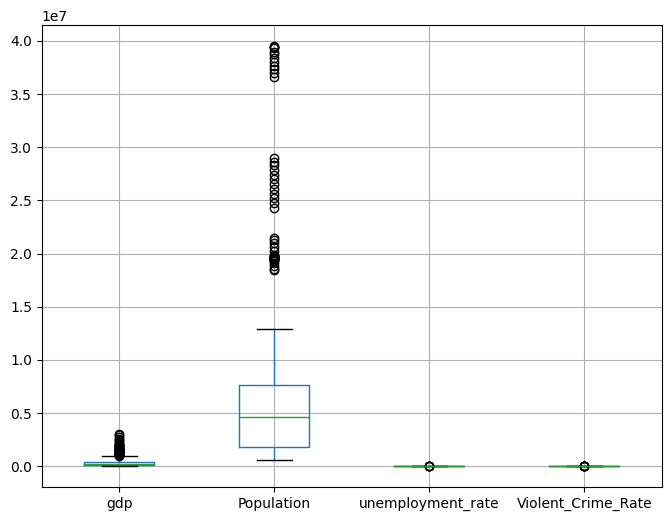

In [57]:
df.boxplot(column=['gdp', 'Population', 'unemployment_rate', 'Violent_Crime_Rate'], figsize=(8,6))
plt.show()

In [58]:
crime_rate_line_chart = alt.Chart(df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

crime_rate_line_chart

alt.Chart(...)

In [59]:
all_states = df['state'].unique().tolist()

treatment_states = ['Alaska', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Iowa',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'New Jersey', 'New Mexico', 'New York', 'North Dakota',
       'Rhode Island', 'Vermont', 'Washington', 'West Virginia',
       'Wisconsin']

control_states = [state for state in all_states if state not in treatment_states]

In [60]:
print(f'Treatment States: {treatment_states}'
and f'Control States: {control_states}')

Control States: ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Virginia', 'Wyoming']


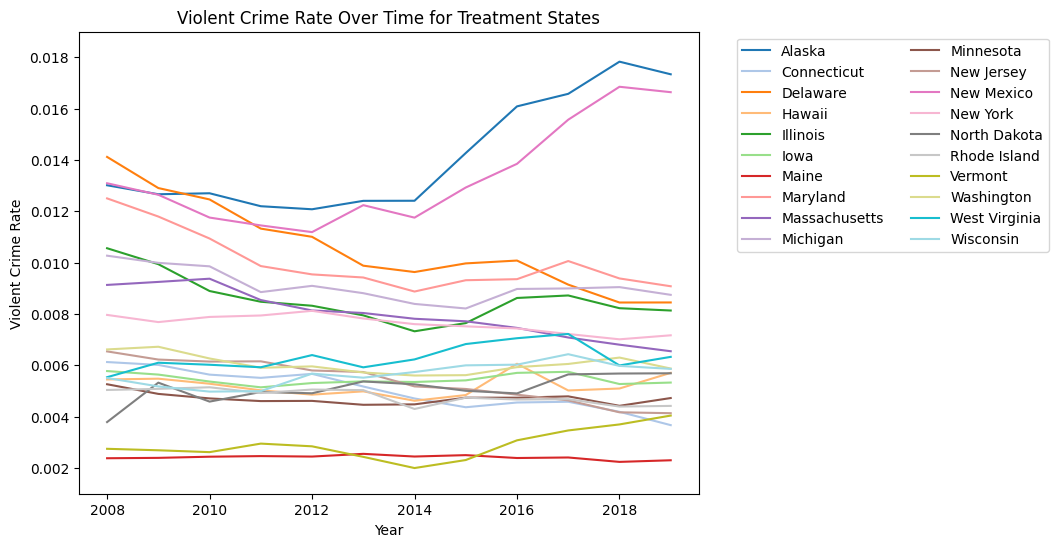

In [61]:
# plot treatment states' crime rate over time using matplotlib in a single plot
fig, ax = plt.subplots(figsize=(8,6))
# using tab20b color palette
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20(np.linspace(0, 1, 20))))

for state in treatment_states:
    df[df['state']==state].plot(x='year', y='Violent_Crime_Rate', ax=ax, label=state, )
plt.legend(ncols=2, bbox_to_anchor=(1.05, 1))
plt.ylim(0.001, 0.019)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.title('Violent Crime Rate Over Time for Treatment States')
plt.show()

# save to file
fig.savefig('../30_results/treatment_states_crime_rate.png', bbox_inches='tight')

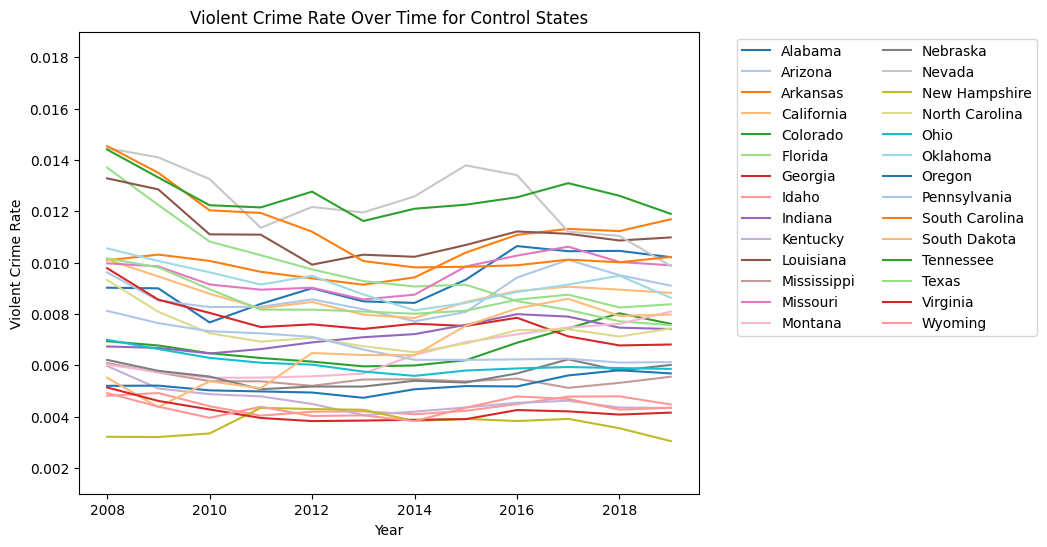

In [62]:
# plot control states' crime rate over time
fig, ax = plt.subplots(figsize=(8,6))
# using tab20b color palette
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20(np.linspace(0, 1, 20))))

for state in control_states:
    df[df['state']==state].plot(x='year', y='Violent_Crime_Rate', ax=ax, label=state, )
plt.legend(ncols=2, bbox_to_anchor=(1.05, 1))
plt.ylim(0.001, 0.019)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.title('Violent Crime Rate Over Time for Control States')
plt.show()

# save to file
fig.savefig('../30_results/control_states_crime_rate.png', bbox_inches='tight')

In [63]:
# Select the variables of interest
selected_vars = ['Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55-64', '65+', 
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'Population', 
       'international_migration',
       'Total People Experiencing Homelessness', 'gdp',
       'gini', 
       'unemployment_rate']

# Select the statistics of interest
selected_stats = ['min', 'max','mean', 'std']

In [64]:
summary_table = df[selected_vars].describe().loc[selected_stats]
summary_table = summary_table.round(3)
summary_table

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,American Indian or Alaska Native,Asian or Pacific Islander,Black or African American,White,Population,international_migration,Total People Experiencing Homelessness,gdp,gini,unemployment_rate
min,0.190,0.071,0.099,0.232,0.099,0.074,3011.000,5239.000,6502.000,4.037750e+05,532981.00,-697.000,515.000,25999.300,0.400,0.024
max,0.296,0.124,0.142,0.324,0.165,0.213,790100.000,6751372.000,3898379.000,2.915865e+07,39512223.00,167173.000,151278.000,3042694.100,0.516,0.138
mean,0.244,0.090,0.118,0.268,0.131,0.148,91280.887,393360.330,904805.602,5.080361e+06,6472218.71,16573.111,11969.399,351650.726,0.461,0.060
std,0.019,0.006,0.008,0.017,0.011,0.022,132596.492,898392.264,1036083.244,5.469300e+06,7142130.35,27126.218,21143.996,436006.192,0.020,0.023


In [12]:
summary_table.to_csv('../20_intermediate_files/summary_table.csv')

In [65]:
crime_vars = ['Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate']

In [66]:
summary_table_2 = df[crime_vars].describe().loc[selected_stats]
summary_table_2 = summary_table_2.round(3)
summary_table_2 

,Violent,Property,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny-Theft,Vehicle Theft,with_death_penalty,Violent_Crimes,Violent_Crime_Rate
min,643.000,8211.000,5.000,85.000,53.000,444.000,1275.000,6451.000,196.000,0.000,1254.000,0.002
max,185173.000,1080766.000,2142.000,15506.000,69385.000,105541.000,245767.000,678455.000,192529.000,1.000,370346.000,0.018
mean,25640.944,171026.875,319.719,2052.007,7034.016,16021.609,36472.707,119228.307,15325.958,0.648,51068.295,0.007
std,31545.421,195771.375,363.166,2295.517,10108.506,19225.258,43519.134,131319.729,24959.546,0.478,62909.913,0.003


In [67]:
correlation_matrix = df[selected_vars].corr()

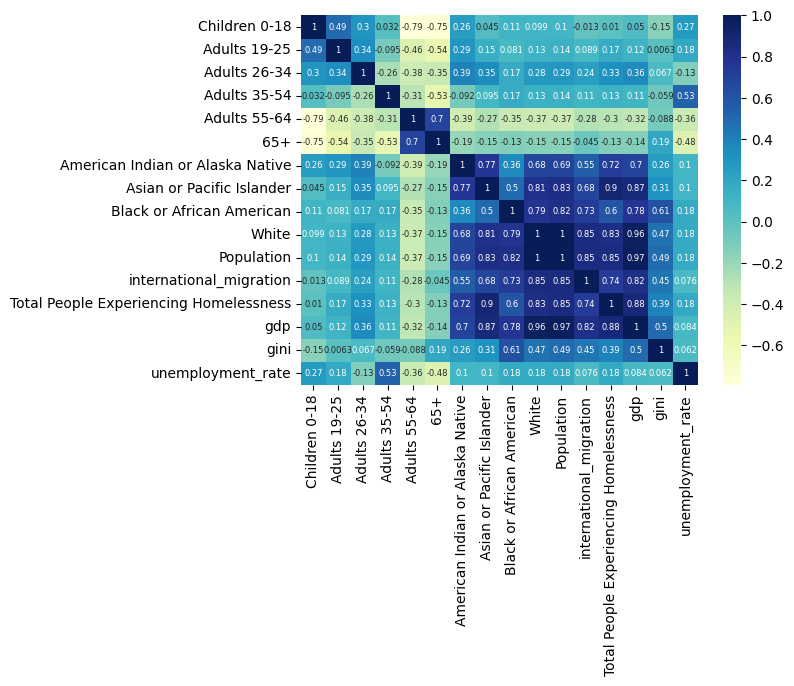

In [68]:
sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu", annot_kws={"fontsize":6})
plt.show()

In [69]:
df['gdp_per_capita'] = df['gdp']/df['Population']
df['Adults 55+'] = df['Adults 55-64'] + df['65+']

In [70]:
updated_vars = ['Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55+',
       'international_migration',
       'Total People Experiencing Homelessness', 
       'gini', 'gdp_per_capita',
       'unemployment_rate']

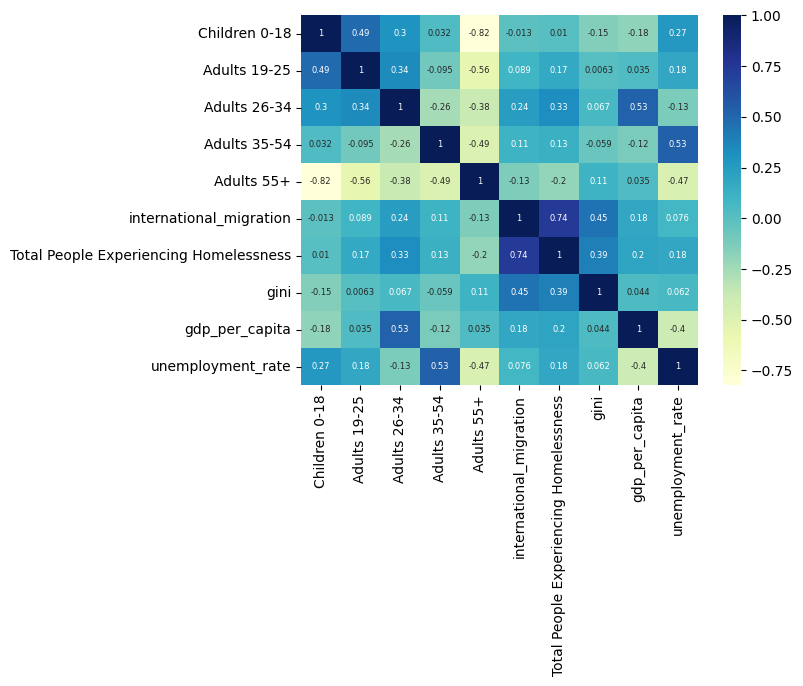

In [71]:
correlation_matrix_2 = df[updated_vars].corr()
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix_2, annot=True,cmap="YlGnBu", annot_kws={"fontsize":6})

# Display the plot
plt.show()

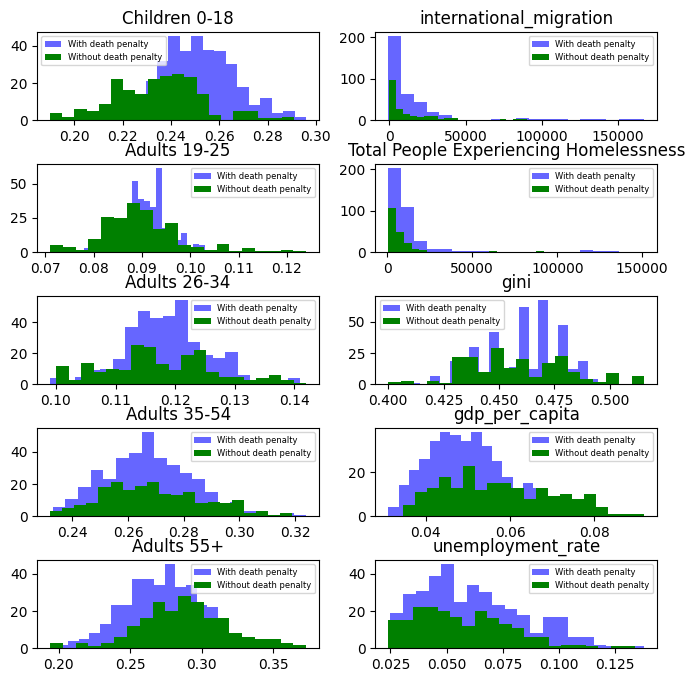

In [72]:
death_penalty = df[df['with_death_penalty'] == 1][updated_vars]
no_death_penalty = df[df['with_death_penalty'] == 0][updated_vars]
# Create histograms of the variables
#fig, axs = plt.subplots(nrows=len(updated_vars), ncols=1, figsize=(8,40))
fig, axs = plt.subplots(5,2,figsize=(8,8))

for i, var in enumerate(updated_vars):
    axs[i%5][i//5].hist(death_penalty[var], color='blue', alpha=0.6, bins=20, label='With death penalty')
    axs[i%5][i//5].hist(no_death_penalty[var], color='green', bins=20, label='Without death penalty')
    axs[i%5][i//5].set_title(var)
    axs[i%5][i//5].legend(fontsize=6)

#plt.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.show()

In [73]:
death_penalty_chart = alt.Chart(df).mark_boxplot().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='with_death_penalty:N'
)

death_penalty_chart.properties(title='Violent Crime Rate by Year and Death Penalty Status')

alt.Chart(...)

In [74]:
abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, 
                "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011,
                "Iowa": 1965, "Maine": 1887, "Maryland": 2013, 
                "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911,
                "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009,
                "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984,
                "Vermont": 1972, "Virginia": 2021, "Washington": 2018,
                "West Virginia": 1965, "Wisconsin": 1853}

### Case: Illinois
abolished year: 2011
check the violent crime information prior to 2011 and chose comparison states for Illinois

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [76]:
variables = ['Population', 'gdp_per_capita', 'unemployment_rate', 'Violent_Crime_Rate']

In [77]:
k_df = df.copy()
k_df = k_df[variables]

In [78]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(k_df)

In [79]:
# Cluster data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
labels = kmeans.labels_

In [80]:
# Add cluster labels to data
df['Cluster'] = labels

# Find states in the same cluster as Illinois
illinois_cluster = df.loc[df['state'] == 'Illinois', 'Cluster'].values[0]
similar_states = df.loc[df['Cluster'] == illinois_cluster, 'state'].unique().tolist()

print(similar_states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']


abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, 
                "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011,
                "Iowa": 1965, "Maine": 1887, "Maryland": 2013, 
                "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911,
                "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009,
                "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984,
                "Vermont": 1972, "Virginia": 2021, "Washington": 2018,
                "West Virginia": 1965, "Wisconsin": 1853}

In [81]:
compare_states1 = ['Alabama', 'Arizona', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Illinois','Indiana','Louisiana']

In [82]:
compare_states2 = ['Illinois', 'Missouri', 'Nevada','North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']

In [83]:
case_df = df.copy()
case_df = case_df[case_df['state'].isin(compare_states1) & (case_df['year'] >= 2000) & (case_df['year'] <= 2011)]

In [84]:
case_graph = alt.Chart(case_df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

case_graph

alt.Chart(...)

In [85]:
case_df = df.copy()
case_df = case_df[case_df['state'].isin(compare_states2) & (case_df['year'] >= 2000) & (case_df['year'] <= 2011)]

In [86]:
case_graph = alt.Chart(case_df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

case_graph

alt.Chart(...)

Pennsylvania, South Carolina, Florida

In [87]:
case_states = ['Illinois', 'Pennsylvania', 'South Carolina', 'Florida']

In [88]:
case_df = df.copy()
case_df = case_df[case_df['state'].isin(case_states) & (case_df['year'] >= 2006) & (case_df['year'] <= 2017)]

### Diff-in-Diff

In [89]:
def model_reg(data, Y, X, alpha=0.05):
   
    x = data.loc[pd.notnull(data[Y]), X]
    xmin = x.min()
    xmax = x.max()
    step = (xmax - xmin) / 100
    grid = np.arange(xmin, xmax + step, step)
    predictions = pd.DataFrame({X: grid})
    model = smf.ols(f"{Y} ~ {X}", data=data).fit()
    model_predict = model.get_prediction(predictions[X])
    predictions[Y] = model_predict.summary_frame()["mean"]
    predictions[["ci_low", "ci_high"]] = model_predict.conf_int(alpha=alpha)
    return predictions

In [90]:
def build_chart(data, Y, X, alpha=0.05,colour='grey',indicator='Control States'):
    predictions = model_reg(data, Y, X, alpha)
    predictions['Category'] = indicator
    base = alt.Chart(predictions).mark_line(color=colour).encode(
        x=alt.X(
            X, 
            scale=alt.Scale(zero=False), 
            axis = alt.Axis(format="T", 
            title = "Year")), 
        y = alt.Y(
            Y, 
            scale=alt.Scale(zero=False),
            title = "Violent Crime Rate"),
        color=alt.Color("Category", legend=alt.Legend(title="Legend")),
    )
    ci = (
        alt.Chart(predictions)
        .mark_errorband(color = 'grey',opacity=0.2)
        .encode(
            x=X,
            y=alt.Y("ci_low", title=""),
            y2="ci_high",
        )
    )
    chart = ci + base
    return chart



In [91]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [92]:
il = case_df.copy()
pre_il_tr = il[(il['year'] <= 2011) & (il['state'] == 'Illinois')]
post_il_tr = il[(il['year'] >= 2012)& (il['year'] <= 2017) & (il['state'] == 'Illinois')]
pre_il_ctr = il[(il['year'] <= 2011) & (il['state'] != 'Illinois')]
post_il_ctr = il[(il['year'] >= 2012)& (il['year'] <= 2017) & (il['state'] != 'Illinois')]


In [93]:
pre_il_plot = build_chart(pre_il_tr,  "Violent_Crime_Rate", "year", 
    alpha=0.02, colour='red', indicator='Illinois')
post_il_plot = build_chart(post_il_tr, "Violent_Crime_Rate", "year",alpha=0.02,colour='red',indicator='Illinois')

pre_ctr_plot = build_chart(pre_il_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')
post_ctr_plot = build_chart(post_il_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')


diff_in_diff_final = pre_il_plot + post_il_plot + pre_ctr_plot + post_ctr_plot
diff_in_diff_final.properties(title="Difference in Difference Analysis of Violent Crime Rate between Illinois and Control States")

alt.LayerChart(...)

# Panel Analysis

In [94]:
from linearmodels.panel import PanelOLS

In [95]:
#rename the columns
df = df.rename(columns={'Children 0-18': 'children', 'Adults 19-25': 'adults_19_25', 'Adults 26-34': 'adults_26_34',
         'Adults 35-54': 'adults_35_54', 'Adults 55+': 'adults_55_plus', 'Total People Experiencing Homelessness': 'homelessness'})

In [96]:
trick_states = ['Arizona', 'Oregon', 'Pennsylvania']

In [97]:
# Define the conditions and values for the three categories
conditions = [
    df['state'].isin(trick_states),
    df['with_death_penalty'] == 1,
    df['with_death_penalty'] == 0
]
values = [3, 2, 1]

# Apply the conditions and values using np.select()
df['penalty_category'] = np.select(conditions, values)

In [98]:
df['penalty_category'].value_counts()
   

penalty_category
2    337
1    203
3     36
Name: count, dtype: int64

In [99]:
# Specify the panel data variables
panel_vars = ['State', 'year']

# Specify the independent and dependent variables
y_var = 'Violent_Crime_Rate'
x_vars = ['with_death_penalty','children', 'adults_19_25', 'adults_26_34',
       'adults_35_54', 'adults_55_plus',
       'international_migration',
       'homelessness', 
       'gini', 'gdp_per_capita',
       'unemployment_rate']

# Create a panel data structure
df_panel = df.set_index(panel_vars)

# Run a fixed effects regression with time and entity fixed effects
model = PanelOLS.from_formula(f"{y_var} ~ 1 + {' + '.join(x_vars)} + EntityEffects + TimeEffects", data=df_panel)
results = model.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)

In [100]:
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Violent_Crime_Rate   R-squared:                        0.1763
Estimator:                   PanelOLS   R-squared (Between):              0.0128
No. Observations:                 576   R-squared (Within):              -0.2977
Date:                Mon, Apr 17 2023   R-squared (Overall):             -0.0144
Time:                        20:13:32   Log-likelihood                    3358.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.8486
Entities:                          48   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                  F(11,506)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):            -17.637
                            

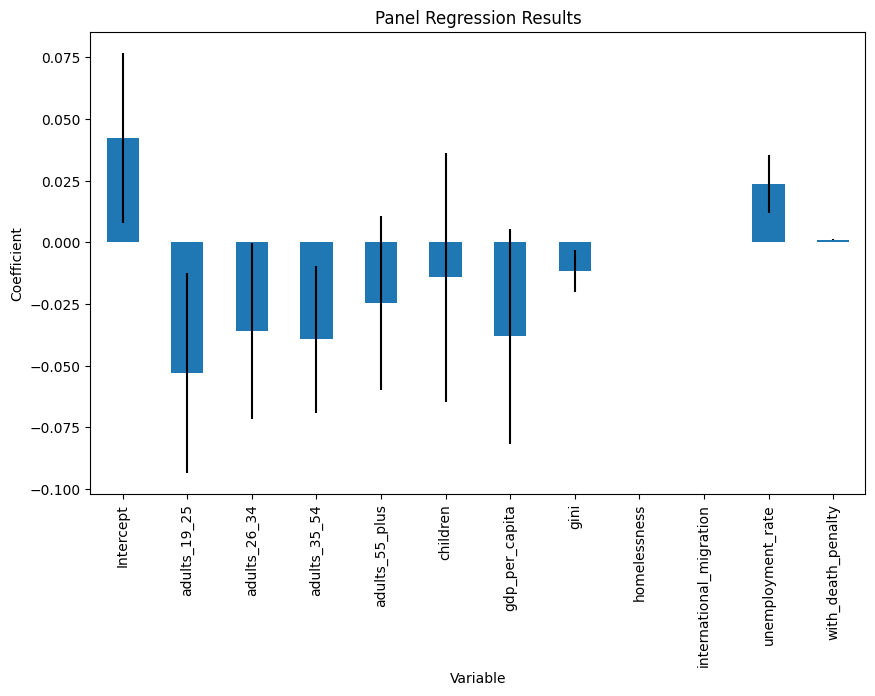

In [101]:
# Extract the relevant coefficients and standard errors
coefficients = results.params
se = results.std_errors

# Create a new DataFrame with the coefficients and standard errors
results_df = pd.concat([coefficients, se], axis=1)
results_df.columns = ['Coefficients', 'Standard Errors']

# Plot the results
results_df.plot(kind='bar', y='Coefficients', yerr='Standard Errors', figsize=(10, 6), legend=None)
plt.title('Panel Regression Results')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.show()


In [102]:
#save the result table to a graph
with open('regression_results.tex', 'w') as f:
    f.write(results.summary.as_latex())


### only include states abolish death penalty

In [110]:
# select states in treatment_states
df_subset = df[df['state'].isin(treatment_states)]
assert df_subset.state.nunique() == 20, "There should be 20 states in the subset."

# set multi-index
df_subset_panel = df_subset.set_index(panel_vars)

# Run a fixed effects regression with time and entity fixed effects
model2 = PanelOLS.from_formula(f"{y_var} ~ 1 + {' + '.join(x_vars)} + EntityEffects + TimeEffects", data=df_subset_panel)
results2 = model2.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(results2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Violent_Crime_Rate   R-squared:                        0.3582
Estimator:                   PanelOLS   R-squared (Between):             -0.0274
No. Observations:                 240   R-squared (Within):              -1.3347
Date:                Mon, Apr 17 2023   R-squared (Overall):             -0.1351
Time:                        20:18:18   Log-likelihood                    1403.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      10.045
Entities:                          20   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                  F(11,198)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             3.6007
                            

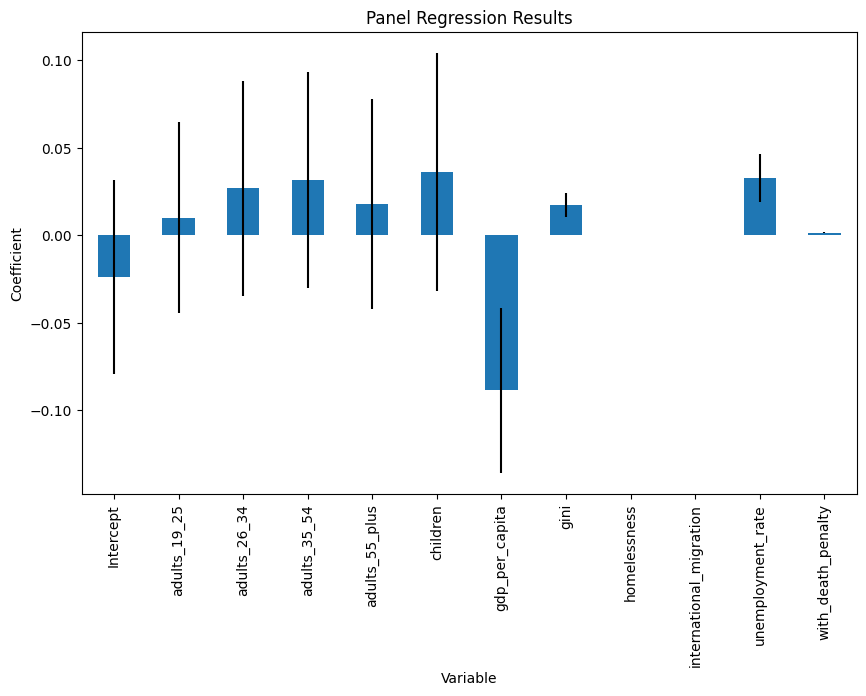

In [111]:
# Extract the relevant coefficients and standard errors
coefficients2 = results2.params
se2 = results2.std_errors

# Create a new DataFrame with the coefficients and standard errors
results2_df = pd.concat([coefficients2, se2], axis=1)
results2_df.columns = ['Coefficients', 'Standard Errors']

# Plot the results
results2_df.plot(kind='bar', y='Coefficients', yerr='Standard Errors', figsize=(10, 6), legend=None)
plt.title('Panel Regression Results')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.show()


In [112]:
#save the result table to a graph
with open('regression_results_2.tex', 'w') as f:
    f.write(results.summary.as_latex())


### Try Matching

In [ ]:
df_copy = df.copy()

In [ ]:
## Convert numeric variables into categorical
df_copy["State"] = pd.Categorical(df_copy.State).codes
df_copy["year"] = pd.Categorical(df_copy.year).codes

In [ ]:
df_copy.columns

Index(['state', 'children', 'adults_19_25', 'adults_26_34', 'adults_35_54',
       'Adults 55-64', '65+', 'year', 'homelessness', 'gdp',
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'gini', 'international_migration',
       'unemployment_rate', 'State', 'Population', 'Index', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate', 'gdp_per_capita',
       'adults_55_plus'],
      dtype='object')

In [ ]:
df_copy.drop(
    axis=1,
    columns=[ 'year', 'State', 'Adults 55-64', '65+', 'American Indian or Alaska Native','Asian or Pacific Islander',
       'Black or African American', 'White', 'state', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft'],
    inplace = True
)
df_copy.reset_index(inplace=True)


In [ ]:
df_copy.drop(axis=1, labels=['index'],inplace=True)

In [ ]:
df_copy

,children,adults_19_25,adults_26_34,adults_35_54,homelessness,gdp,gini,international_migration,unemployment_rate,Population,Index,with_death_penalty,Violent_Crimes,Violent_Crime_Rate,gdp_per_capita,adults_55_plus
0,0.258,0.095,0.113,0.282,5387,174526.3,0.4700,5409,0.050,4677464,211401,1,42218,0.009026,0.037312,0.253
1,0.257,0.093,0.116,0.277,6080,170930.9,0.4700,5319,0.098,4708708,199201,1,42388,0.009002,0.036301,0.257
2,0.254,0.094,0.113,0.276,6046,177249.2,0.4700,1053,0.093,4785401,187191,1,36726,0.007675,0.037040,0.264
3,0.251,0.094,0.112,0.274,5558,183916.6,0.4700,5162,0.087,4803689,193358,1,40332,0.008396,0.038287,0.269
4,0.249,0.095,0.112,0.270,5209,189245.5,0.4700,6282,0.073,4817528,190571,1,43386,0.009006,0.039283,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.256,0.092,0.123,0.244,798,38426.9,0.4374,860,0.042,586555,12451,1,2553,0.004353,0.065513,0.284
572,0.255,0.089,0.121,0.245,857,35879.0,0.4360,530,0.053,585501,12890,1,2805,0.004791,0.061279,0.291
573,0.253,0.086,0.123,0.236,873,36980.7,0.4326,795,0.042,578934,11886,1,2716,0.004691,0.063877,0.302
574,0.243,0.083,0.121,0.244,639,39171.7,0.4555,708,0.041,577601,11543,1,2470,0.004276,0.067818,0.310


In [ ]:
!pip install dame_flame
import dame_flame

  Using cached dame_flame-0.51-py3-none-any.whl (36 kB)


In [ ]:
mat_model = dame_flame.matching.DAME(repeats=False,verbose=3, want_pe=True)
mat_model.fit(
    df_copy,
    treatment_column_name="with_death_penalty",
    outcome_column_name="Violent_Crime_Rate",
)

## Display results
result = mat_model.predict(df_copy)

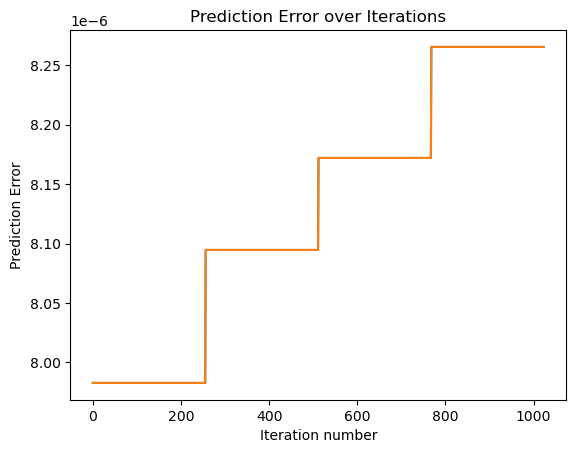

In [ ]:
plt.plot(mat_model.pe_each_iter)
plt.title("Prediction Error over Iterations")
plt.xlabel("Iteration number")
plt.ylabel("Prediction Error")
plt.show()